Live Coding Week 2 Lesson <b>
====================================================

In [47]:
import numpy
from matplotlib import pyplot
%matplotlib inline

Set parameters for the time-marching methods:<br>
the final time (T) <br>
the time-step size (dt) <br>
the number of time steps to compute (N)<br>

In [48]:
T = 100.0
dt = 0.02
N = int(T/dt) + 1

We want to track the elevation of the glider over the time <br>
Descretize the time interval [0,T]

In [49]:
t = numpy.linspace(0.0, T, num = N)

In [50]:
t

array([0.000e+00, 2.000e-02, 4.000e-02, ..., 9.996e+01, 9.998e+01,
       1.000e+02])

In [51]:
t = numpy.arange(0.0, T + 0.5*dt, dt)

In [52]:
t

array([0.000e+00, 2.000e-02, 4.000e-02, ..., 9.996e+01, 9.998e+01,
       1.000e+02])

Alternative to linspace is arange

In [53]:
z0 = 100.0
b0 = 10.0
zt = 100.0
g = 9.81

u = numpy.array([z0, b0]) #Unknown Array 

z = numpy.zeros(N) #Solution Array
z[0] = z0

Eulers Method:<br>
u(t+delta t) = u(t) + delta t f(u(t))

In [59]:
for n in range (1, N):
    f_u = numpy.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * f_u
    z[n] = u[0]

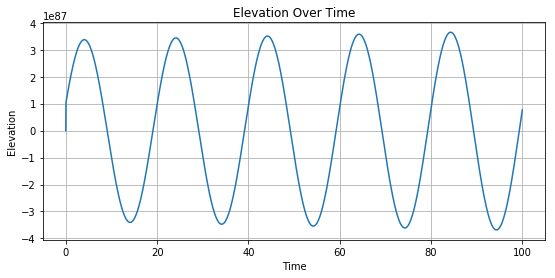

In [61]:
pyplot.figure(figsize = (9.0, 4.0))
pyplot.title('Elevation Over Time')
pyplot.xlabel('Time')
pyplot.ylabel('Elevation')
pyplot.grid()
pyplot.plot(t,z)

In [62]:
w = numpy.sqrt(g/zt)
z_exact = b0/w * numpy.sin(w*t) + (z0 - zt) * numpy.cos(w*t) + zt

In [63]:
def l1_norm(z, z_exact, dt):
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

In [64]:
l1_norm(z, z_exact,dt)

2.2494462151708195e+89

In [68]:
dt_values = (0.1, 0.05, 0.01, 0.005, 0.001, 0.0001)

z_values = []

for dt in dt_values:
    N = int(T/dt) + 1
    u = numpy.array([z0,b0])
    z = numpy.zeros(N)
    z[0] = z0
    for n in range (1, N):
        f_u = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * f_u
        z[n] = u[0]
    z_values.append(z)

In [69]:
error_values = []
for z, dt in zip(z_values, dt_values):
    N = int(T/dt) + 1
    t = numpy.linspace(0.0, T, num = N)
    z_exact = b0/w * numpy.sin(w*t) + (z0 - zt) * numpy.cos(w*t) + zt
    error = l1_norm(z, z_exact, dt)
    error_values.append(error)

Based on plot (loglog) it converges with 1st order

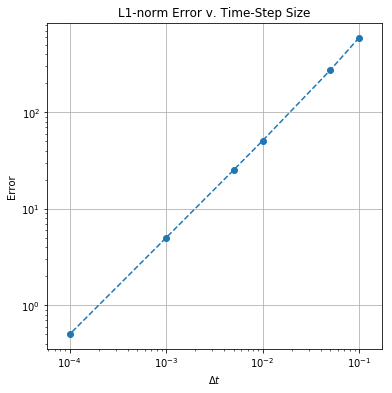

In [70]:
#For analyzing errors, it is best to use a plot with a logarithmic scale
#To Do so, use the function pyplot.loglog
pyplot.figure(figsize = (6.0,6.0))
pyplot.title('L1-norm Error v. Time-Step Size')
pyplot.xlabel('$\Delta t$') # Use for character commands
pyplot.ylabel('Error')
pyplot.grid() #turns on grid
pyplot.loglog(dt_values, error_values, color = 'C0', linestyle = '--', marker = 'o')
pyplot.axis('equal'); #Scale axis equally

How to determine this analytically <br>
du/dt = (u(t+dt) - u(t))/dt + truncation*dt

In [83]:
def euler(u0, dt, N):
    u = numpy.zeros((N, 2))
    u[0] = u0
    for n in range (1,N):
        f_u = numpy.array([u[n-1, 1], g * (1 - u[n-1, 0] / zt)])
        u = u + dt * f_u
        return u

In [85]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

z_values = []

for dt in dt_values:
    N = int(T/dt) + 1
    u0 = numpy.array([z0, b0])
    u = euler(u0, dt, N)
    z = u[:, 0]
    z_values.append(z)

Lesson Three<b>
=========================

In [33]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [34]:
#Constants
g = 9.81 #m/s^2
vt = 30.0 #trim velocity
CD = 1.0/40 #Drag Coefficient
CL = 1.0 #Lift Ccoefficient

#Initial Conditions
v0 = vt #initial velocity is trim velocity
theta0 = 0.0 # trajectory angle
x0 = 0.0 #Horizontal Position
y0 = 1000.0 #Vertical Position


In [44]:
def rhs_phugoid(u, CL, CD, g, vt):
    v, theta, x, y = u
    rhs = numpy.array([-g*math.sin(theta) - CD / CL * g / vt**2 * v**2, -g*math.cos(theta) / v + g / vt**2 * v, v * math.cos(theta), v * math.sin(theta)])
    return rhs

In [45]:
def euler_step(u, f, dt, *args):
    u_n = u + dt * f(u, *args)
    return u_n

In [46]:
T = 100.0 
dt = 0.1
N = int(T/dt)+1

In [47]:
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])

In [49]:
for n in range(N-1):
    u[n+1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)

In [50]:
x = u[:, 2]
y = u[:, 3]

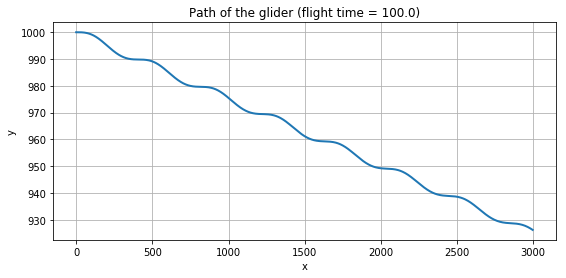

In [51]:
# Plot the path of the glider.
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Path of the glider (flight time = {})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x, y, color='C0', linestyle='-', linewidth=2);

In [52]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]
u_values = []

In [54]:
for dt in dt_values:
    N = int(T/dt) + 1
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range (N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD,g, vt)
    u_values.append(u)

In [56]:
def l1_diff(u_coarse, u_fine, dt):
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine/N_coarse)
    diff = dt*numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

In [57]:
diff_values = []

for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

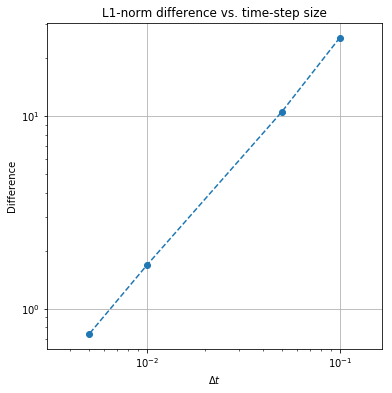

In [58]:
# Plot the difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm difference vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

In [61]:
r = 2
h = 0.001

dt_values2 = [h, r*h, r**2 * h]
u_values2 = []

for dt in dt_values2:
    N = int(T/dt) + 1
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values2.append(u)

In [62]:
f2_f1 = l1_diff(u_values2[1][:, 2], u_values2[0][:, 2], dt_values2[1])
f3_f2 = l1_diff(u_values2[2][:, 2], u_values2[1][:, 2], dt_values2[2])
p = math.log(f3_f2/f2_f1)/math.log(r)
print('Observed order of convergencec: p = {:.3f}'.format(p))

Observed order of convergencec: p = 1.014


Challenge<b>
=========